# Project 1
## The Net Wars: Attack of the Bots
### Advanced Machine Learning - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

|Class  |Label |
| ----- | ---- | 
|Normal	|0     |
|Dos	|1     |
|R2L	|2     |
|U2R	|3     |
|Probe	|4     |

In [121]:
PATH_TO_DATA = 'dataset/'

test_students = pd.read_csv(PATH_TO_DATA + 'test_students.csv')
SampleID = test_students['SampleID']

train_students = pd.read_csv(PATH_TO_DATA + 'train_students.csv')


In [122]:
test_students = test_students.drop('SampleID', axis=1)

In [123]:
print(test_students.info())
print(train_students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44556 entries, 0 to 44555
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     44556 non-null  int64  
 1   protocol_type                44556 non-null  object 
 2   service                      44556 non-null  object 
 3   flag                         44556 non-null  object 
 4   src_bytes                    44556 non-null  int64  
 5   dst_bytes                    44556 non-null  int64  
 6   land                         44556 non-null  int64  
 7   wrong_fragment               44556 non-null  int64  
 8   urgent                       44556 non-null  int64  
 9   hot                          44556 non-null  int64  
 10  num_failed_logins            44556 non-null  int64  
 11  logged_in                    44556 non-null  int64  
 12  num_compromised              44556 non-null  int64  
 13  root_shell      

O service do train_students tem mais um tipo que no test_students. Acabei por tirar para facilitar

In [124]:
train_students = pd.get_dummies(train_students, columns=['protocol_type'], drop_first=True)
train_students = train_students.drop('service', axis=1)
#train_students = pd.get_dummies(train_students, columns=['service'], drop_first=True)
train_students= pd.get_dummies(train_students, columns=['flag'], drop_first=True)

test_students = pd.get_dummies(test_students, columns=['protocol_type'], drop_first=True)
test_students = test_students.drop('service', axis=1)
#test_students = pd.get_dummies(test_students, columns=['service'], drop_first=True)
test_students= pd.get_dummies(test_students, columns=['flag'], drop_first=True)

In [125]:
train_students.replace('normal', 0, inplace=True)
train_students.replace('Dos', 1, inplace=True)
train_students.replace('R2L', 2, inplace=True)
train_students.replace('U2R', 3, inplace=True)
train_students.replace('Probe', 4, inplace=True)


In [126]:
y_train = train_students['attack_type']
X_train = train_students.drop('attack_type', axis=1)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_t, y_train, y_t = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_t, y_t, test_size=0.5, random_state=42)

### Ensembles

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

voting = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('kn', knn), 
        ('dt', dt), 
        ('rf', rf)
    ],
    voting='soft'
)

ensemble = GridSearchCV(
    voting,
    {},
    scoring=['accuracy', 'precision', 'recall', 'f1_micro'],
    refit='accuracy',
    cv=5
)

ensemble.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(max_iter=1000)),
                                                    ('kn',
                                                     KNeighborsClassifier()),
                                                    ('dt',
                                                     DecisionTreeClassifier()),
                                                    ('rf',
                                                     RandomForestClassifier())],
                                        voting='soft'),
             param_grid={}, refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1_micro'])

In [30]:
lista_classifiers = [('LogisticRegression', lr), ('KNeighborsClassifier', knn), ('DecisionTreeClassifier', dt), ('RandomForestClassifier', rf), ('VotingClassifier', voting), ]

### Todos os modelos

In [ ]:
for name, model in lista_classifiers:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_micro')
    print(f'F1-Score: {scores.mean()} ', f'(+/- {scores.std()}) [{name}]')

### Demorou a correr então não experimentei

In [ ]:
scores = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='f1_micro')
print(f'F1-Score: {scores.mean()} ', f'(+/- {scores.std()}) [{name}]')

In [130]:
pred = ensemble.predict(test_students)

In [131]:
submission = pd.DataFrame({'SampleID': SampleID, 'Class': pred})
print(submission)
submission.to_csv('submission1.csv', index=False)

       SampleID  Class
0             0      0
1             1      0
2             2      0
3             3      0
4             4      1
...         ...    ...
44551     44551      0
44552     44552      1
44553     44553      1
44554     44554      0
44555     44555      0

[44556 rows x 2 columns]


### Só modelo ensemble

Ainda deve existir algum overfitting

Accuracy: 0.9941323585994614 [LogisticRegression]
F1-score: 0.9941323585994614 [LogisticRegression]
Precision: 0.9941323585994614 [LogisticRegression]
Recall: 0.9941323585994614 [LogisticRegression]
Confusion Matrix: [LogisticRegression]


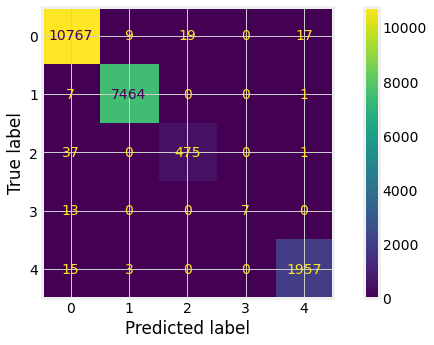

In [133]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

print(f'Accuracy: {accuracy_score(y_test, pred)} [{name}]')
print(f'F1-score: {f1_score(y_test, pred, average="micro")} [{name}]')
print(f'Precision: {precision_score(y_test, pred, average="micro")} [{name}]')
print(f'Recall: {recall_score(y_test, pred, average="micro")} [{name}]')
print(f'Confusion Matrix: [{name}]')
conf_m = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=[0,1,2,3,4])
conf_m.plot()
plt.show()

### Todos os modelos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

for name, model in lista_classifiers:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, pred)} [{name}]')
    print(f'F1-score: {f1_score(y_test, pred, average="micro")} [{name}]')
    print(f'Precision: {precision_score(y_test, pred, average="micro")} [{name}]')
    print(f'Recall: {recall_score(y_test, pred, average="micro")} [{name}]')
    print(f'Confusion Matrix: [{name}]')
    conf_m = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=[0,1,2,3,4])
    conf_m.plot()
    plt.show()
    print("===========================================")